# Assignment 2

## Jade Benson

This notebook is a pilot study for my final project in the 2022 class "Cultural Patterns" where I use computational methods to identify cultural trends. I wanted to keep this notebook public for use in my portfolio - it can also be accessed on Github at: https://github.com/JadeBenson/Healthy_Food.  

## Research Question and Motivation

I am interested in how different groups discuss their relationships with food online, particularly how specific foods are moralized and constructed to be "healthy." The fitness community has many subgroups that demonize certain food groups, primarily carbs which can be seen in diet trends like "Keto," "Paleo," and "Counting Macros." Even something so simple as describing highly processed foods as "junk" conveys a moral argument about the worth of certain foods, and by extension, the worth of the people who regularly consume them. This moralistic rhetoric, often accompanied by images of idealized bodies or bodies to shame (or both in before-and-afters), can inspire restrictive dieting and fears surrounding certain foods and bodies. But opposition groups have also arisen to try to combat this ideology, like the body positive movement. This community tries to celebrate bodies of diverse sizes, shapes, and abilities while removing moralistic associations with food to allow for an "intuitive" eating relationship that tries to reduce the stress of other eating practices. There is perhaps even a third community of professionals (dietians, public health officials, doctors) who acknowledge the need of moderate diets to address the consequences of obesity (particularly in the US), but how this problem is larger than just eating and includes food deserts, economic inequality, easy access to nutrient deficient foods, and corporate incentives. These communities have competing definitions of what constitutes "healthy." 

In this research project, I aim to use Twitter data to identify how people describe and conceptualize "healthy" food and eating and how this differs across subgroups. I am also interested in whether these subgroups are interconnected - is there cross-talk across these groups or are they relatively distinct with separate cultures and understandings of health? Does the professional group attempt to infilitrate fitness influencer or body positive conversations as a part of public health campaigns to give people access to other types of food/diet information? Do certain fitness/diet groups co-op the language of "obesity" and "obesity crisis" as a moralistic term aimed at scaring people into particular ways of eating? Does the body positive movement discredit the metrics and tools of other communities (BMI, calorie counting) to re-establish their own understanding of healthy? I am interested in computationally analyzing these conversations to better understand how healthy food and eating are constructed online. 

## Data Sources and Methods 

I am planning on using the Twitter API to scrape tweets related to these groups and topics of healthy eating and food. I think Twitter is perhaps the best social media site to use for this project because it includes so many diverse groups on the same platform. It also primarily centers around text conversations which allows us to better see how people are talking about these subjects. The replies/mentions can be easily analyzed too so we can see whether there is cross-talk or if the groups are distinct. I have also conducted a prior project using the Twitter API and scraping data, so I feel more comfortable conducting this analysis in the short time frame. I think Tiktok may skew a little younger and more informal so would likely have fitness and body positive content, but perhaps not professionals. It also centers around videos more so than text and I'm interested in how people talk about these concepts - but it would be interesting to expand my skill set to try to get video transcriptions or how the images in videos relate to their short descriptions/tags. Reddit would be another option, but I am less familar with the pages that I would need to scrape to effectively cover these conversations. This might make a good backup plan though as I am a little concerned that searching Twitter for "healthy" right now may return more COVID content than food (I'll try to address this with conditions). Reddit might allow for more granular searches, but may not have as much back-and-forth which I am interested in studying. 


Deciding how to write a query that effectively picks up all these communities without grabbing too much irrelevant information will be a big challenge for the final version of this project. I'm trying to capture my idea of the three communities, but this might be baiting searches. Ideally, I want this project to be a combination of identifying linguistic and cultural communities and describing how they differentially use language and understand health and eating. If I am too granular with my searches, I might just be returning findings that I expect since I've filtered them to be that way, rather than capturing the potential complexities of larger cultural patterns. If I leave this query too broad, I may end up with irrelevant or disparate information which makes it challenging to find meaningful cohesive groups. If you have any recommendations on how to balance these problems, I'd love to discuss it in more depth. 

I just perform a topic analysis here where I try to assess how people are talking about healthy eating and whether these are distinct or more mixed. I am curious about this "moralistic" dimension of discourse. However, I find this is a little more difficult to capture. Perhaps the phrase "clean eating" is easier to identify as moralistic since it's associating certain types of food and eating practices with being "clean" and others as "dirty." But how do we capture the moral dimension of "fat" since it's used in so many contexts? Fat could be mentioned as one of the macronutrients needed in a healthy diet, an insult or fear from so many online, or a reclaiming of the word to find neutraility in it as just a descriptive adjective as seen in the bodypositive community. This sort of different meanings of words for different groups is challenging to capture both without and certainly with computational methods.   

In this version, I don't explicitly perform any network analysis. I am primarily interested in identifying the primary topics in Tweets and whether these are relatively pure (separate groups with distinct linguistic patterns/ideologies) or whether they are more mixed (groups sharing language/ideologies). I think that in the final version of this analysis, it could be interesting to plot which users are interacting with who and how their language differs. It would be intersting to not only identify what topics people are discussing and whether these are relatively distinct, but also to see how these people and these topics interact/intersect in networks/threads. If this is perhaps too much, it could be easier to look at what tweets caused the most discussion or were the most popular based on their retweet, like, or other engagement counts. 

## Data Gathering

In this section, I'll use the Twitter API to scrape tweets for a preliminary analysis. I use a small sample of tweets for this topic analysis test run. In the final version, I plan on expanding the number of Tweets scraped, tuning the search criteria, and conducting a more in-depth analyis of the users and their networks.

In [361]:
import tweepy
from tweepy import OAuthHandler

import requests

import pandas as pd
import numpy as np
import csv
import re
import string
import time


import nltk
import gensim
from gensim import corpora, models
from gensim.utils import simple_preprocess 
from gensim.models import CoherenceModel

import pyLDAvis
from pyLDAvis import gensim_models 
import pickle 
import os
from pprint import pprint

import matplotlib.pyplot as plt

In [2]:
#Jade's Twitter API 2.0 info 

#these API tokens might need regeneration
#api_token = "1393223500832382977-1AjGzeeo4Ue6PgFb0bV7ipOvwTezBF" 
#api_token_secret = "rSTeeGm2el1kFwC8kuyqK9upG3DGiCHKbMyyjix9lYNUl"

#access_token = "1393223500832382977-pXEzv2zITWvZpbUyGhxgjv6FyadfjJ"
#access_token_secret = "CJ3T7qSw43CgkMi0CC5Ecb8tiZMIA246xjnhkV8Qy1Ppv"

bearer_token = "AAAAAAAAAAAAAAAAAAAAAK%2FyZAEAAAAAknoZzdqGK6OIOejAHvMLFwAZ%2FaA%3DNm5WcRTGkrng2Jxg0ZQzuWfUGsqr1kJMtZKVuvSFMrjWsRiNPQ"
#from viral sentiments: bearer_token="AAAAAAAAAAAAAAAAAAAAAKROPwEAAAAArHftxA3yStRytXjFAYSPUj7180Y%3DTU6cQLajxIvPmhPDuxh0SQ5mMsjW7QbZYs6CyR8PNjDFwj8yMN"

In [3]:
def bearer_oauth(r):
    """
    Method required by bearer token authentication.
    """

    r.headers["Authorization"] = f"Bearer {bearer_token}"
    r.headers["User-Agent"] = "v2FullArchiveSearchPython"
    return r

In [123]:
#create the URL to search the API (search/recent)
#https://developer.twitter.com/en/docs/twitter-api/tweets/search/integrate/build-a-query

#params for recent search 
#https://developer.twitter.com/en/docs/twitter-api/tweets/search/api-reference/get-tweets-search-recent

def connect_to_endpoint(my_query, page_token):
    """
    Queries the API for 100 recent tweets using my_query for unique pages (token) 
    
    Input: 
        my_query: (str) consult the Twitter doc for formatting 
        page_token: (str) token returned by Twitter to track unique pages 
    
    Return: 
        dictionary of tweets, meta data, and token 
    """
     
    
    search_url = "https://api.twitter.com/2/tweets/search/recent"
    
    params = {'query': my_query,
            'expansions': "author_id,referenced_tweets.id,referenced_tweets.id.author_id,entities.mentions.username,in_reply_to_user_id,geo.place_id",
            'tweet.fields': 'id,text,author_id,in_reply_to_user_id,geo,conversation_id,created_at,lang,public_metrics,referenced_tweets,reply_settings',
            'user.fields': 'description,id,location,name,url,username,verified',
            'max_results' : 100,
            'next_token': page_token}
    
    #defaults to scrape from start time of now to 7 days ago 
    
    response = requests.request("GET", search_url, auth=bearer_oauth, params=params)
    
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()

In [137]:
def process_batch_of_tweets(df_tweets, twitter_json): 
    """
    Processes scraped Twitter information and places it into a dataframe 
    Inputs: 
        df_tweets: (df) dataframe with columns for Twitter info 
        twitter_json: (json) returned information from Twitter query 
    
    Returns:
        dataframe with new info
    """
    
    for r in twitter_json['data']: 
        tweet_id = r['id']
        author_id = r['author_id']
        tweet_time = r['created_at']
        convo_id = r['conversation_id']

        tweet_text = r['text']

        num_retweets = r['public_metrics']['retweet_count']
        num_replies = r['public_metrics']['reply_count']
        num_likes = r['public_metrics']['like_count']
        num_quotes = r['public_metrics']['quote_count']

        if 'referenced_tweets' in r: 
            type_reference = r['referenced_tweets'][0]['type']
            referenced_tweet = r['referenced_tweets'][0]['id']

            if type_reference == 'replied_to':
                replied_to_user = r['in_reply_to_user_id']
            else: 
                replied_to_user = None
        else:
            type_reference = None
            referenced_tweet = None
            replied_to_user = None

        #just add the dictionaries to df for now 
        #can figure out if/how to keep these later
        if 'entities' in r: 
            mentions_dict = r['entities']
        else: 
            mentions_dict = None 

        if 'includes' in r: 
            includes_dict = r['includes']
        else: 
            includes_dict = None


         # Add the 11 variables to the empty list - ith_tweet:
        ith_tweet = [tweet_id,
                     author_id,
                     tweet_time,
                     convo_id, 
                     tweet_text,
                     num_retweets, 
                     num_replies, 
                     num_likes, 
                     num_quotes, 
                     type_reference, 
                     referenced_tweet, 
                     replied_to_user, 
                     mentions_dict, 
                     includes_dict
                     ]
        # Append to dataframe - db_tweets
        df_tweets.loc[len(df_tweets)] = ith_tweet
        
    

In [143]:
def scrape_Twitter(my_query, num_batches):
    """
    Scrapes recent Twitter data using query for number of batches with 100 Tweets 
    
    Inputs: 
        my_query: (str) formatted query for Twitter API 
        num_batches: (int) number of batches of 100 to run 
    
    Returns: 
        df with Twitter information 
        csv with Twitter information
    """
    
    program_start = time.time()
    
    page_token = {}
    
    newest_id = {}
    
    df_tweets = pd.DataFrame(columns = ['tweet_id',
                                        'author_id',
                                        'tweet_created_at',
                                        'conversation_id',
                                        'text',
                                        'retweets', 
                                         'replies', 
                                         'likes', 
                                         'quotes', 
                                         'type_reference',
                                         'referenced_tweet',
                                         'replied_to_user', 
                                         'mentions_dict',
                                         'thread_dict'                                     
                                       ])

    
    for b in range(num_batches): 
        
        batch_start = time.time()
        
        twitter_json = connect_to_endpoint(my_query, page_token)
        
       
        process_batch_of_tweets(df_tweets, twitter_json) 
        
        
        try: 
            page_token = twitter_json["meta"]['next_token']
        
        except: 
            print("No more new responses")
            break
            
        batch_end = time.time()
        
        batch_run = round((batch_end-batch_start)/60, 2)
        
        print('Batch {} completed in {} mins'.format(b, batch_run))
        
        
        #might need to sleep here to avoid timing out API 
        #time.sleep(920) #15 minute sleep time

    
    #will update this with time of scraping when scaled up
    filename = "Twitter_A1_217.csv"
    
    df_tweets.to_csv(filename, index = False)
    
    program_end = time.time()
    
    scrape_end = round((program_end-program_start)/60, 2)

    print("Scraping done! Time elapsed is {} mins".format(scrape_end))
    
    return df_tweets




In [97]:
#build a query guide 
#https://developer.twitter.com/en/docs/twitter-api/tweets/search/integrate/build-a-query 
#words in parathenses is an AND 

#this needs more work/suggestions

my_query = "((healthy food) OR (healthy eat) OR (diet food) OR (diet eat) OR (lose weight) OR (bodypositive OR intuitive eating) OR (obesity) OR (keto OR paleo OR macros OR calories )) lang:en"

In [214]:
#scrape 5,000 tweets for this trial run 
#very manageable but should also work for the topic modelling
tweets_df = scrape_Twitter(my_query, 50)

Batch 0 completed in 0.02 mins
Batch 1 completed in 0.02 mins
Batch 2 completed in 0.03 mins
Batch 3 completed in 0.02 mins
Batch 4 completed in 0.02 mins
Batch 5 completed in 0.02 mins
Batch 6 completed in 0.02 mins
Batch 7 completed in 0.02 mins
Batch 8 completed in 0.02 mins
Batch 9 completed in 0.02 mins
Batch 10 completed in 0.02 mins
Batch 11 completed in 0.02 mins
Batch 12 completed in 0.02 mins
Batch 13 completed in 0.02 mins
Batch 14 completed in 0.02 mins
Batch 15 completed in 0.02 mins
Batch 16 completed in 0.03 mins
Batch 17 completed in 0.02 mins
Batch 18 completed in 0.03 mins
Batch 19 completed in 0.02 mins
Batch 20 completed in 0.02 mins
Batch 21 completed in 0.02 mins
Batch 22 completed in 0.03 mins
Batch 23 completed in 0.02 mins
Batch 24 completed in 0.02 mins
Batch 25 completed in 0.03 mins
Batch 26 completed in 0.02 mins
Batch 27 completed in 0.02 mins
Batch 28 completed in 0.02 mins
Batch 29 completed in 0.02 mins
Batch 30 completed in 0.02 mins
Batch 31 completed

In [215]:
len(tweets_df)

4988

In [216]:
#make sure unique tweets!
len(tweets_df['tweet_id'].unique())

4988

In [217]:
#had some difficulty with people repeatedly tweeting the same thing
#often at celebrities (yeonjun, a kpop star) about recent news about their eating/diets 
#remove these so it doesn't skew results 
print(len(tweets_df['text'].unique()) ) 

3565


In [219]:
tweets_df = tweets_df.drop_duplicates(subset=['text'])

In [233]:
tweets_df = tweets_df.reset_index()

In [234]:
tweets_df.tail()

,index,tweet_id,author_id,tweet_created_at,conversation_id,text,retweets,replies,likes,quotes,type_reference,referenced_tweet,replied_to_user,mentions_dict,thread_dict,clean_text
3560,4982,1494423212167507977,21199284,2022-02-17T21:27:13.000Z,1494399556183805954,@Gamer_Ely Very well rounded. Big and strong ...,0,0,0,0,replied_to,1494421496730578951,96482822,"{'mentions': [{'start': 0, 'end': 10, 'usernam...",None,Ely Very well rounded Big and strong from heav...
3561,4983,1494423175647662082,1487763426978013187,2022-02-17T21:27:04.000Z,1494423175647662082,RT @heyspacecup: What is your favorite cake? 😋...,1,0,0,0,retweeted,1494418274733465611,None,"{'mentions': [{'start': 3, 'end': 15, 'usernam...",None,What is your favorite cake food Foodies plantb...
3562,4984,1494423169238814725,3064266184,2022-02-17T21:27:03.000Z,1494423169238814725,#Microsoft's Small Step to Disable Macros Is a...,0,0,0,0,None,None,None,None,None,Microsoft s Small Step to Disable Macros Is a ...
3563,4985,1494423165946183684,1446199429283864576,2022-02-17T21:27:02.000Z,1494423053207580681,@PopCrave @PrimeVideo Promoting obesity again,0,2,6,0,replied_to,1494423053207580681,4429003533,"{'mentions': [{'start': 0, 'end': 9, 'username...",None,Promoting obesity again
3564,4986,1494423156693557249,326176182,2022-02-17T21:27:00.000Z,1494423156693557249,RT @24kpepe: Instead of “Calories” I would lik...,22,0,0,0,retweeted,1493194796382318592,None,"{'mentions': [{'start': 3, 'end': 11, 'usernam...",None,Instead of Calories I would like food labels t...


In [221]:
len(tweets_df)

3565

In [235]:
#initial text cleaning 
#remove links, mentions with usernames, and non-letters 
clean_f = lambda x: ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split())
tweets_df["clean_text"] = tweets_df["text"].apply(clean_f)

#remove "RT" in these too 
remove_RT = lambda x: x.replace('RT ', '')
tweets_df["clean_text"] = tweets_df["clean_text"].apply(remove_RT)


<>:3: DeprecationWarning: invalid escape sequence \w
<>:3: DeprecationWarning: invalid escape sequence \w
/var/folders/gy/w5ghr6zn5jn84fzh3qwwsnbm0000gn/T/ipykernel_13448/3221443767.py:3: DeprecationWarning: invalid escape sequence \w
  clean_f = lambda x: ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split())


In [236]:
#this looks a little better
tweets_df.head()

,index,tweet_id,author_id,tweet_created_at,conversation_id,text,retweets,replies,likes,quotes,type_reference,referenced_tweet,replied_to_user,mentions_dict,thread_dict,clean_text
0,0,1494477075029405707,1336870828491812866,2022-02-18T01:01:15.000Z,1494475358892179458,@funwithjane2 @PequenosDre Oh great. \nHonestl...,0,0,0,0,replied_to,1494476360034697218,1417538563835629568,"{'mentions': [{'start': 0, 'end': 13, 'usernam...",None,Oh great Honestly does it even matter I mean I...
1,1,1494477074882433032,1360758604509241345,2022-02-18T01:01:15.000Z,1494467444563275787,@jatluh Happy Friday. May the day be a good da...,0,0,0,0,replied_to,1494467877495525377,937102963578949632,"{'mentions': [{'start': 0, 'end': 7, 'username...",None,Happy Friday May the day be a good day for you...
2,2,1494477065252442113,1433143822180028417,2022-02-18T01:01:13.000Z,1494475016578207744,@thxsshxt We need to eat to be healthy and liv...,0,0,0,0,replied_to,1494475016578207744,1492547886713909253,"{'mentions': [{'start': 0, 'end': 9, 'username...",None,We need to eat to be healthy and live but sayi...
3,3,1494477040866799618,1050428356762710022,2022-02-18T01:01:07.000Z,1494477040866799618,"Research the requirements of a dietary fast, T...",0,0,0,0,None,None,None,None,None,Research the requirements of a dietary fast Th...
4,4,1494477032788348930,1360758604509241345,2022-02-18T01:01:05.000Z,1494467444563275787,@rozcei Happy Friday. May the day be a good da...,0,0,0,0,replied_to,1494467850437685258,1206734106005921792,"{'mentions': [{'start': 0, 'end': 7, 'username...",None,Happy Friday May the day be a good day for you...


In [275]:
#there was also a lot of advertising spamming where it was mentioning different people but the same text 
#the content analysis picked this up 
#but it doesn't tell us much about cultural patterns 
#except perhaps Twitter scams and multilevel marketing for diets (which is a BIG thing)
len(tweets_df['clean_text'].unique())

3204

In [276]:
tweets_df = tweets_df.drop_duplicates(subset=['clean_text'])
tweets_df = tweets_df.reset_index()

In [277]:
clean_tweets = tweets_df['clean_text']

First, let's perform a simplistic analysis to see if "moralistic" language is being used. Again, I think that this is difficult to properly capture. I'm going to go with something very basic for this initial test for a proof of concept, but hopefully the topics will pick up on more nuance. 

In [154]:
# Thank you Jon! I've written attempts at these that are much messier - this makes everything easier :)  

def get_wordnet_pos(word):
    '''
    Tags each word with its Part-of-speech indicator -- specifically used for lemmatization in the get_lemmas function
    '''
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {'J': nltk.corpus.wordnet.ADJ,
                'N': nltk.corpus.wordnet.NOUN,
                'V': nltk.corpus.wordnet.VERB,
                'R': nltk.corpus.wordnet.ADV}

    return tag_dict.get(tag, nltk.corpus.wordnet.NOUN)

def get_lemmas(text):
    '''
    Gets lemmas for a string input, excluding stop words, punctuation
    '''
    # Define stop words
    my_stops = ['re', 'also', 'lot', 'around', 'as']
    stop = nltk.corpus.stopwords.words('english') + list(string.punctuation) + my_stops
    
    # Combine list elements together into a single string to use NLTK's tokenizer
    #our text is already a single string - don't need this
    #text = ' '.join(text)
    #print("text: " , text)
    
    # tokenize + lemmatize words in text 
    #only include if longer than 1 character (weird single letters/numbers)
    tokens = [i for i in nltk.word_tokenize(text.lower()) if i not in stop and len(i) > 1]
    #print("tokens: " , tokens)

    lemmas = [nltk.stem.WordNetLemmatizer().lemmatize(t, get_wordnet_pos(t)) for t in tokens]
    #print("lemmas: " , lemmas)

    return lemmas

def get_tokens(text):
    '''
    Gets all tokens (including stop words), excluding punctuation
    '''
    # drop punctuation, but keep stopwords for initial word counting
    text = text.translate(str.maketrans('', '', string.punctuation))

    # tokenize remaining words and make a list of them for input `text`
    tokens = [i for i in nltk.word_tokenize(text.lower())]
    return tokens


In [225]:
def simple_moralistic_perc(text): 
    #Jon also wrote this function - just tweaking for my use
    
    #get text with stopwords still included
    text = get_tokens(text)
    
    #is this moral or disgust? 
    #I definitely think these are related but the same? 
    moral_count = (text.count("moral")
                        + text.count("immoral")
                        + text.count("should")
                       + text.count("clean")
                       + text.count("bad")
                       + text.count("junk")
                        + text.count("gross"))
    return moral_count /len(text)



In [278]:
moral_per = clean_tweets.apply(simple_moralistic_perc)


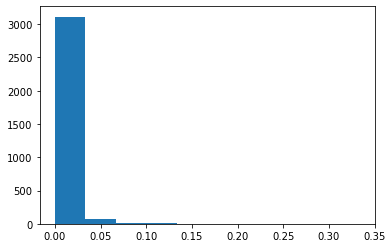

In [279]:
plt.hist(moral_per);

In [280]:
count = 0
for m in moral_per: 
    if m > 0: 
        count+=1
print("Number of moralistic tweets: ", count)
print("Percentage of moralistic in full sample: ", (count / len(clean_tweets))*100)
#about 6% of tweets have some moral language

Number of moralistic tweets:  215
Percentage of moralistic in full sample:  6.710362047440698


Seems like overall, very few tweets use this type of language. This may be a good thing that I'm only picking up a little bit of the fatphobia and harassment which persists online. However, there is a small group that is using moralistic language quite frequently. It may be worth looking at those tweets with very high moralistic percentages to see what type of subjects they're talking about and better understand how and why this language is being used. 

An interesting update on this: originally, when I ran this with duplicated clean text allowed, the percentage of moralistic tweets was 11%. Most of the tweets used to market diets and spam Twitter users centered around moralistic language (perhaps to shame people into using their products?). 

In [281]:
index_counter = 0 
i_m_list = []
for m in moral_per: 
    if m > 0.10: 
        i_m_list.append([index_counter, m])
    index_counter +=1

In [282]:
i_m_list

[[226, 0.14285714285714285],
 [658, 0.18181818181818182],
 [900, 0.125],
 [1495, 0.3333333333333333],
 [1611, 0.14285714285714285],
 [1769, 0.1111111111111111],
 [1824, 0.1111111111111111],
 [2413, 0.25]]

In [283]:
tweets_df.iloc[1495, :]

level_0                                                  1768
index                                                    2299
tweet_id                                  1494452868731924482
author_id                                           118584046
tweet_created_at                     2022-02-17T23:25:04.000Z
conversation_id                           1494452868731924482
text                Obesity is gross. https://t.co/CE2yxrytIn
retweets                                                    0
replies                                                     0
likes                                                       0
quotes                                                      0
type_reference                                         quoted
referenced_tweet                          1494354444456116227
replied_to_user                                          None
mentions_dict                                            None
thread_dict                                              None
clean_te

In [284]:
tweets_df.iloc[2413, :]

level_0                                                          2731
index                                                            3713
tweet_id                                          1494436769655398401
author_id                                                  2267087153
tweet_created_at                             2022-02-17T22:21:05.000Z
conversation_id                                   1492160375013482501
text                                  @hunger All should eat healthy!
retweets                                                            0
replies                                                             0
likes                                                               1
quotes                                                              0
type_reference                                             replied_to
referenced_tweet                                  1492160375013482501
replied_to_user                                             215132925
mentions_dict       

Seems like there are different motivations behind using moralistic language. The most moralistic tweet is using this language to shame and express disgust at obesity, while another is using it to advocate for healthy food access. 

Let's move on to topic modeling and hope that this gives us more useful information about the type of language used to discuss healthy eating. 

In [285]:
clean_tweets

0       Oh great Honestly does it even matter I mean I...
1       Happy Friday May the day be a good day for you...
2       We need to eat to be healthy and live but sayi...
3       Research the requirements of a dietary fast Th...
4       7 Successful People s Daily Habits 1 Meditate ...
                              ...                        
3199    Ely Very well rounded Big and strong from heav...
3200    What is your favorite cake food Foodies plantb...
3201    Microsoft s Small Step to Disable Macros Is a ...
3202                              Promoting obesity again
3203    Instead of Calories I would like food labels t...
Name: clean_text, Length: 3204, dtype: object

In [286]:
#lemmatize our text 
lemmas = [get_lemmas(tweet) for tweet in clean_tweets]

In [287]:
lemmas[0:5]

[['oh',
  'great',
  'honestly',
  'even',
  'matter',
  'mean',
  'try',
  'lose',
  'weight',
  'matter',
  'chip',
  'use',
  'scoop',
  'shirazi',
  'seed',
  'oil',
  'free'],
 ['happy',
  'friday',
  'may',
  'day',
  'good',
  'day',
  'forget',
  'smile',
  'fill',
  'stomach',
  'healthy',
  'food',
  'take',
  'care',
  'spirit',
  'activity'],
 ['need',
  'eat',
  'healthy',
  'live',
  'say',
  'hard',
  'time',
  'people',
  'understand',
  'try',
  'best',
  'ilysm'],
 ['research',
  'requirement',
  'dietary',
  'fast',
  'many',
  'different',
  'type',
  'fast',
  'design',
  'help',
  'lose',
  'weight',
  'get',
  'healthy'],
 ['successful',
  'people',
  'daily',
  'habit',
  'meditate',
  'rise',
  'early',
  'get',
  'plenty',
  'rest',
  'eat',
  'balance',
  'diet',
  'read']]

In [288]:
#create bigrams 
#maybe trigrams later too? 

#create bigrams if they appear > 5 times
bigram = models.Phrases(lemmas, min_count = 5)
bigram_mod = models.phrases.Phraser(bigram)
bigram_lemmas = [bigram_mod[word] for word in lemmas]

In [256]:
#bigram_lemmas
#some interesting ones 
#obviously a lot of advertising here with "next_app" and "ad" appearing so often 
#"lifestyle_fitness" "anxiety_pain" "body_type" "climate_change" "lose_weight" politician names "balance diet"

## Topic Modeling

In [289]:
dictionary = corpora.Dictionary(bigram_lemmas)
bow_corpus = [dictionary.doc2bow(text) for text in bigram_lemmas]

In [290]:
Lda = gensim.models.ldamodel.LdaModel

In [336]:
def calc_plot_coherence(smallest_n, largest_n, bow_corpus, dictionary, bigram_lemmas): 
    """
    Calculates the coherence for varing topic numbers 
    """
    coherence = []

    for k in range(smallest_n,largest_n):

        print('Topics: '+str(k))

        #these are just the parameters that worked in my last topic modeling
        #will do a grid search for alpha and eta next
        #maybe worth expanding grid search for passes, chunksize, and iterations in next version 

        ldamodel = Lda(corpus = bow_corpus, num_topics=k, id2word = dictionary, random_state = 42,\
            passes=10, chunksize = 40, iterations = 100, alpha = 0.5, eta = 5, eval_every = None)

        cm = CoherenceModel(model=ldamodel, texts=bigram_lemmas,\
                                                         dictionary=dictionary, coherence='c_v')

        print("number of topics: ", k, "coherence: ", cm.get_coherence())

        coherence.append((k,cm.get_coherence()))
    
    #plot this
    x_val = [x[0] for x in coherence]
    y_val = [x[1] for x in coherence]


    plt.plot(x_val,y_val)
    plt.scatter(x_val,y_val)
    plt.title('Number of Topics vs. Coherence')
    plt.xlabel('Number of Topics')
    plt.ylabel('Coherence')
    plt.xticks(x_val)
    plt.show()

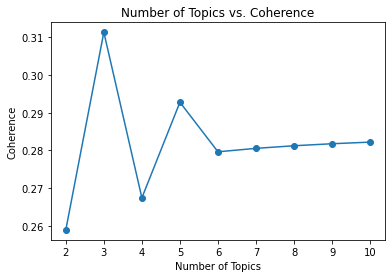

In [292]:
#This is from when I orginally ran the above function 

It looks like 3 topics fits the best! Although this is kind of a weird coherence map. 

## Mini Hyperparameter Tuning

In [293]:
#values as small as 0.01 have been shown to work well with short documents (like tweets) 

#Alpha
#small numbers (sparse): each document only represents a few topics
#take the approach from: https://stats.stackexchange.com/questions/349761/reasonable-hyperparameter-range-for-latent-dirichlet-allocation
#range from sparse to non-sparse 

alpha = [0.01, 0.05, 0.1, 0.5, 1, 5]

#Beta
#small numbers (sparse) produce more and more granular topics 

beta = [0.01, 0.05, 0.1, 0.5, 1, 5]

#could expand this to also search for other hyperparameters later

model_results = {'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []}

# iterate through alpha values
for a in alpha:
    # iterare through beta values
    for b in beta:
        # get the coherence score for the given parameters
        #3 topics looked like the best from the above coherence scores 
        #I'll use the number of passes, chunksize, and iterations from Jon's best model
        #later versions hopefully I can tune these parameters too 
        ldamodel = Lda(corpus = bow_corpus, num_topics=3, id2word = dictionary, random_state = 42,\
        passes=20, chunksize = 50, iterations = 400, alpha = a, eta = b, eval_every = None)
    

        cm = gensim.models.coherencemodel.CoherenceModel(model=ldamodel, texts=bigram_lemmas,\
                                                         dictionary=dictionary, coherence='c_v')


        cv = cm.get_coherence()

        # Save the model results
        model_results['Topics'].append(6)
        model_results['Alpha'].append(a)
        model_results['Beta'].append(b)
        model_results['Coherence'].append(cv)

lda_tuning = pd.DataFrame(model_results)


In [301]:
#these are pretty mediocre coherence scores 
#I'll have to think more about how to clean and prepare this later so these are better 

##WHOOPS! This is really 3 topics, I just messed up after running some earlier code 
#but this takes awhile to run. Sorry!
lda_tuning

,Topics,Alpha,Beta,Coherence
0,6,0.01,0.01,0.273387
1,6,0.01,0.05,0.280641
2,6,0.01,0.10,0.342588
3,6,0.01,0.50,0.322844
4,6,0.01,1.00,0.317783
5,6,0.01,5.00,0.427416
6,6,0.05,0.01,0.253291
7,6,0.05,0.05,0.255399
8,6,0.05,0.10,0.341827
9,6,0.05,0.50,0.325593


In [298]:
#10 best models by coherence to choose from 

lda_tuning_sorted = lda_tuning.sort_values(by=['Coherence'])
lda_tuning_sorted.tail(10)

,Topics,Alpha,Beta,Coherence
25,6,1.00,0.05,0.340220
8,6,0.05,0.10,0.341827
2,6,0.01,0.10,0.342588
14,6,0.10,0.10,0.344963
20,6,0.50,0.10,0.356868
21,6,0.50,0.50,0.361515
26,6,1.00,0.10,0.397072
5,6,0.01,5.00,0.427416
17,6,0.10,5.00,0.432420
11,6,0.05,5.00,0.454220


In [299]:
#maximum coherence score model? 
max_coherence = lda_tuning["Coherence"].max()
lda_tuning[lda_tuning["Coherence"]== max_coherence]

,Topics,Alpha,Beta,Coherence
11,6,0.05,5.0,0.45422


These coherence scores are pretty mediocre. I think some additional text cleaning or perhaps a tighter search query would result in more defined and pure topics. Tuning the additional hyperparameters (chunksize, iterations, etc.) may help as well as expanding the dataset size. 

## Topic Visualization 

In [188]:
def LDA_visualize(my_corpus, my_num_topics, my_id2word, my_passes, my_chunksize, my_iter, my_alpha, my_beta, name): 
    """
    Runs an LDA model with the above specifications 
    Saves model in a pickle 
    Prints the model to an HTML to visualize 
    """
    #build LDA model 
    Lda = gensim.models.ldamodel.LdaModel


    lda_model = Lda(corpus=my_corpus, num_topics=my_num_topics, id2word = my_id2word, random_state = 42,\
                    passes=my_passes, chunksize = my_chunksize, iterations = my_iter, eval_every = None,\
                    alpha = my_alpha, eta = my_beta)

    #print keyword in the topics - see if this is a good split? 
    pprint(lda_model.print_topics())

    # Visualize the topics
    pyLDAvis.enable_notebook()

    LDAvis_data_filepath = "ldavis"+ name


    if 1 == 1:
        LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, my_corpus, my_id2word)
        with open(LDAvis_data_filepath, 'wb') as f:
            pickle.dump(LDAvis_prepared, f)

    # load the pre-prepared pyLDAvis data from disk
    with open(LDAvis_data_filepath, 'rb') as f:
        LDAvis_prepared = pickle.load(f)

    pyLDAvis.save_html(LDAvis_prepared, LDAvis_data_filepath +'.html')



In [300]:
#visualize the most coherent topic model 
LDA_visualize(bow_corpus, 3, dictionary, 20, 50, 400, 0.05, 5.0, "max_coherence") 
#I'll submit the file with this best version visualization and upload it to github too 

[(0,
  '0.002*"promote_obesity" + 0.000*"neo" + 0.000*"claim" + '
  '0.000*"controversial" + 0.000*"400_calorie" + 0.000*"mann" + '
  '0.000*"downgoten" + 0.000*"icn" + 0.000*"wtff" + 0.000*"paleo"'),
 (1,
  '0.010*"eat" + 0.008*"calorie" + 0.007*"food" + 0.006*"diet" + '
  '0.005*"lose_weight" + 0.005*"healthy" + 0.005*"get" + 0.005*"like" + '
  '0.004*"obesity" + 0.004*"keto"'),
 (2,
  '0.000*"supermarket" + 0.000*"contact" + 0.000*"product" + 0.000*"gop" + '
  '0.000*"101" + 0.000*"md" + 0.000*"gaslighting" + 0.000*"3977" + '
  '0.000*"chola" + 0.000*"cholassupermarket"')]


In [367]:
#Thank you again for these Jon! Much cleaner than what I've tried before 

def fill_topic_weights(df_row, bow_corpus, ldamodel):
    '''
    Fill DataFrame rows with topic weights for topics in songs.
    
    Modifies DataFrame rows *in place*.
    '''
    try:
        for i in ldamodel[bow_corpus[df_row.name]]:
            df_row["Topic_" + str(i[0])] = i[1]
    except:
        return df_row
    return df_row

def top_tweets_by_topic(tweet_df, ldamodel, corpus, ntop=1):
    '''
    Finds the top "n" tweets by topic, which we can use for
    understanding the types of tweets included in a topic.
    '''
    topn_tweets_by_topic = {}
    for i in range(len(ldamodel.print_topics())):
        # For each topic, collect the most representative tweets(s)
        # (i.e. highest probability containing words belonging to topic):
        top = sorted(zip(range(len(corpus)), ldamodel[corpus]), 
                     reverse=True, 
                     key=lambda x: abs(dict(x[1]).get(i, 0.0)))
        topn_tweets_by_topic[i] = [j[0] for j in top[:ntop]]
        
        # Print out the topn tweets for each topic and return their indices as a dictionary for further analysis:
        print("Topic " + str(i))
        print(tweet_df[['tweet_id','text']].loc[topn_tweets_by_topic[i]])
        print("*******************************")
    
    return topn_tweets_by_topic


In [302]:
#just to make sure right ldamodel 
lmax_coherence_lda_model = Lda(corpus=bow_corpus, num_topics=3, id2word = dictionary, random_state = 42,\
                    passes=20, chunksize = 50, iterations = 400, eval_every = None,\
                    alpha = 0.05, eta = 5.0)

In [305]:
top_tweets_by_topic = top_tweets_by_topic(tweets_df, lmax_coherence_lda_model, bow_corpus, ntop=10)
#well this is at least selecting out different content 
#looks like Topic 0 is some onlyfans/sexy content promotions - I need to figure out what part of my search query is returning that 
#Topic 1 is the only one about actual diets/food/healthy eating
#Topic 2 is someone spamming content to promote their diet program

Topic 0
                 tweet_id                                               text
174   1494474647416582149  Feelin myself!! \n\n#AdultWork #horny #BigBoob...
377   1494471388048023556  Sexy content everyday!  \n\nhttps://t.co/WRKGj...
2537  1494434284748349453  #TBT to when we had this babe in our studio a ...
431   1494470531592114183  🐮🪴 || is a process || 🪴🐮\n\n#bodypositive #plu...
2295  1494438883634790411  The UTAUs in the singer list with me are curre...
2616  1494432970102517761  RT @MoonluBoutique: #hair #specialists #wigs #...
1815  1494447432943419396  RT @Jessica____666: My Onlyfans is littie 🔥👅\n...
55    1494476586443235331  RT @SEMiPYP: Gut microbiome and health: mechan...
171   1494474669856116738  RT @_ashleycoco: Feelin myself!! \n\n#AdultWor...
341   1494472097866911747  RT @CedarUK: Report @TheGrocer that 70 local a...
*******************************
Topic 1
                 tweet_id                                               text
2437  1494436175850913796  E

In [308]:
#why is there a sexual topic? 
tweets_df.iloc[174, 6]

#yikes... maybe I shouldn't use "bodypositive" in the search query 
#this is pretty funny
#it's just pulling up essentially porn content 
#I didn't realize that "body positive" was being used in this way 
#but at least the topic modeling did a great job at pulling this out


'Feelin myself!! \n\n#AdultWork #horny #BigBoobLovers #bigbootymom #bodypositive #egirl #girls #LinkInBio #model #modeling #NSFWTwitter #nsfwtwitter #nsfwtwt #onlyFans #onlyfans #onlyfanschicks #onlyfanscurvy #onlyfansfaves #onlyfanslink #onlyfansnewbie #onlyfanswomen #picoftheday https://t.co/NIJsiz118c'

In [314]:
#how to avoid spammers in the future when I scale this up? 
print(tweets_df.iloc[609, :]) 
print(tweets_df.iloc[808, ])
#It's not even promoting anything exactly - just looks like a user constantly messaging their friends? 
print(tweets_df.iloc[609, 6]) 
print(tweets_df.iloc[808, 6])
#not sure why this isn't getting dropped when only including unique cleaned responses
#oh it's the usernames that have underscores in them only remove the first part 
#maybe use a similarity score between tweets and if tweets are too similar - drop them?
print(tweets_df.iloc[609, 16])
print(tweets_df.iloc[808, 16])
#I could just manually remove this person, but this behavior will likely continue at scale 
#I think I should compare similarity scores of tweets from the same user (author_id) and delete if above threshold


level_0                                                           729
index                                                             887
tweet_id                                          1494467761988575233
author_id                                         1469123406050168835
tweet_created_at                             2022-02-18T00:24:14.000Z
conversation_id                                   1494452979562610688
text                @rosie_ark 🥨– how was ur sleep last night? hop...
retweets                                                            1
replies                                                             1
likes                                                               0
quotes                                                              0
type_reference                                             replied_to
referenced_tweet                                  1494467270231281664
replied_to_user                                   1443369883811475456
mentions_dict       

The biggest lesson that I've learned from these few rounds of data cleaning/processing and running the topic models, is that there is still a lot of work to be done to narrow down my desired content. For the first topic (sexual), I need to re-think and clarify the search query. I didn't realize that bodypositive was being used to advertise explicit content on Twitter. Perhaps if I combine this phrase with eating or healthy, I will narrow down my desired results. Topic 1 is actually the topic that I'm interested in and it seems like this one has more to do with concepts of healthy eating and foods. The final topic 3 demonstrates that there is still spam getting through this cleaning. Spam can be interesting when it includes companies or multilevel marketing groups reaching out to others on Twitter to market their products - we could look at what lanaguage they use to convince people to buy their diets. However, this particular topic seems to be one user tweeting the same encouraging messages at all his friends. This is likely to continue at scale. I think the best way to handle this going forward is to groupby users (author_id) and calculate the similarity metrics between their tweets, if it's above a certain threshold, then we can drop them. This might be computationally expensive but will hopefully allow us to actually see trends amongst the topic 2 group. For now, I'm going to handle this problem by dropping the observations that are in topics 0 or 2 and re-run this one more time. 

In [323]:
topics_tweets = tweets_df.apply(fill_topic_weights,
                          axis=1, args=[bow_corpus, lmax_coherence_lda_model]).fillna(0)

In [316]:
topics_tweets.head()

,Topic_0,Topic_1,Topic_2,author_id,clean_text,conversation_id,index,level_0,likes,mentions_dict,quotes,referenced_tweet,replied_to_user,replies,retweets,text,thread_dict,tweet_created_at,tweet_id,type_reference
0,0.0,0.993805,0.0,1336870828491812866,Oh great Honestly does it even matter I mean I...,1494475358892179458,0,0,0,"{'mentions': [{'start': 0, 'end': 13, 'usernam...",0,1494476360034697218,1417538563835629568,0,0,@funwithjane2 @PequenosDre Oh great. \nHonestl...,0,2022-02-18T01:01:15.000Z,1494477075029405707,replied_to
1,0.0,0.992391,0.0,1360758604509241345,Happy Friday May the day be a good day for you...,1494467444563275787,1,1,0,"{'mentions': [{'start': 0, 'end': 7, 'username...",0,1494467877495525377,937102963578949632,0,0,@jatluh Happy Friday. May the day be a good da...,0,2022-02-18T01:01:15.000Z,1494477074882433032,replied_to
2,0.0,0.991767,0.0,1433143822180028417,We need to eat to be healthy and live but sayi...,1494475016578207744,2,2,0,"{'mentions': [{'start': 0, 'end': 9, 'username...",0,1494475016578207744,1492547886713909253,0,0,@thxsshxt We need to eat to be healthy and liv...,0,2022-02-18T01:01:13.000Z,1494477065252442113,replied_to
3,0.0,0.992393,0.0,1050428356762710022,Research the requirements of a dietary fast Th...,1494477040866799618,3,3,0,0,0,0,0,0,0,"Research the requirements of a dietary fast, T...",0,2022-02-18T01:01:07.000Z,1494477040866799618,0
4,0.0,0.992391,0.0,1462884555304493058,7 Successful People s Daily Habits 1 Meditate ...,1494477031068868608,5,5,0,"{'mentions': [{'start': 3, 'end': 16, 'usernam...",0,1494295598127890438,0,0,21,RT @RezodivRodez: 7 Successful People's Daily ...,0,2022-02-18T01:01:04.000Z,1494477031068868608,retweeted


In [324]:
len(topics_tweets)

3204

In [325]:
#get rid of topic0 
topics_tweets = topics_tweets[topics_tweets['Topic_0']<0.5]

#get rid of topic2 
topics_tweets = topics_tweets[topics_tweets['Topic_2']<0.5]


In [326]:
len(topics_tweets)

3080

In [333]:
topics_tweets = topics_tweets.reset_index(drop = True)

In [334]:
topics_tweets.tail()

,Topic_0,Topic_1,Topic_2,author_id,clean_text,conversation_id,index,level_0,likes,mentions_dict,quotes,referenced_tweet,replied_to_user,replies,retweets,text,thread_dict,tweet_created_at,tweet_id,type_reference
3075,0.0,0.986010,0.0,1247490647621357568,Self talk journaling Working out cooking delic...,1494409434403065862,4981,3559,1,"{'mentions': [{'start': 0, 'end': 13, 'usernam...",0,1494409434403065862,1384161217522982916,0,0,"@harmonybyday Self-talk, journaling, Working o...",0,2022-02-17T21:27:17.000Z,1494423228458143752,replied_to
3076,0.0,0.996982,0.0,21199284,Ely Very well rounded Big and strong from heav...,1494399556183805954,4982,3560,0,"{'mentions': [{'start': 0, 'end': 10, 'usernam...",0,1494421496730578951,96482822,0,0,@Gamer_Ely Very well rounded. Big and strong ...,0,2022-02-17T21:27:13.000Z,1494423212167507977,replied_to
3077,0.0,0.990147,0.0,1487763426978013187,What is your favorite cake food Foodies plantb...,1494423175647662082,4983,3561,0,"{'mentions': [{'start': 3, 'end': 15, 'usernam...",0,1494418274733465611,0,0,1,RT @heyspacecup: What is your favorite cake? 😋...,0,2022-02-17T21:27:04.000Z,1494423175647662082,retweeted
3078,0.0,0.990147,0.0,3064266184,Microsoft s Small Step to Disable Macros Is a ...,1494423169238814725,4984,3562,0,0,0,0,0,0,0,#Microsoft's Small Step to Disable Macros Is a...,0,2022-02-17T21:27:03.000Z,1494423169238814725,0
3079,0.0,0.991769,0.0,326176182,Instead of Calories I would like food labels t...,1494423156693557249,4986,3564,0,"{'mentions': [{'start': 3, 'end': 11, 'usernam...",0,1493194796382318592,0,0,22,RT @24kpepe: Instead of “Calories” I would lik...,0,2022-02-17T21:27:00.000Z,1494423156693557249,retweeted


In [347]:
tweet2_df = topics_tweets.drop(['Topic_0', 'Topic_1', 'Topic_2', 'index', 'level_0'], axis = 1)

# Re-do Topic Modeling 

In [337]:
t2_tweets = topics_tweets["clean_text"]

In [338]:
t2_lemmas = [get_lemmas(tweet) for tweet in t2_tweets]

In [339]:
bigram_2 = models.Phrases(lemmas, min_count = 5)
bigram_mod_2 = models.phrases.Phraser(bigram_2)
bigram_lemmas_2 = [bigram_mod_2[word] for word in t2_lemmas]

In [342]:
dictionary_2 = corpora.Dictionary(bigram_lemmas_2)
bow_corpus_2 = [dictionary_2.doc2bow(text) for text in bigram_lemmas_2]

Topics: 2
number of topics:  2 coherence:  0.3260354423747038
Topics: 3
number of topics:  3 coherence:  0.36872037503514044
Topics: 4
number of topics:  4 coherence:  0.3384290145352565
Topics: 5
number of topics:  5 coherence:  0.40027388381334494
Topics: 6
number of topics:  6 coherence:  0.45406322689086703
Topics: 7
number of topics:  7 coherence:  0.5240977582992946
Topics: 8
number of topics:  8 coherence:  0.5414834054445415
Topics: 9
number of topics:  9 coherence:  0.5815702447410558
Topics: 10
number of topics:  10 coherence:  0.5759237647726805


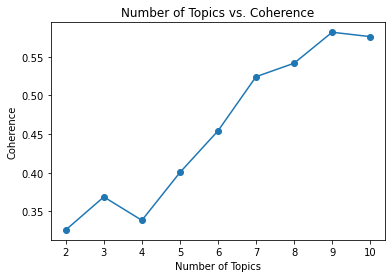

In [343]:
calc_plot_coherence(2, 11, bow_corpus_2, dictionary_2, bigram_lemmas_2)

In [366]:
#These coherence scores look much better! 
#let's try this with 9 topics
#I'm going to skip hyperparameter tuning on this one 
#just use the parameters from last time 
LDA_visualize(bow_corpus_2, 9, dictionary_2, 20, 50, 400, 0.05, 5.0, "max_coherence_2") 


[(0,
  '0.000*"dair" + 0.000*"veganfoodshare" + 0.000*"veganrecipes" + '
  '0.000*"vegansofinstagram" + 0.000*"whatveganseat" + 0.000*"lentil" + '
  '0.000*"govegan" + 0.000*"ethiopian" + 0.000*"crueltyfree" + '
  '0.000*"veganlife"'),
 (1,
  '0.011*"eat" + 0.008*"calorie" + 0.007*"food" + 0.007*"diet" + '
  '0.006*"lose_weight" + 0.005*"healthy" + 0.005*"obesity" + 0.004*"get" + '
  '0.004*"like" + 0.004*"keto"'),
 (2,
  '0.000*"obesity_diabetes" + 0.000*"happiness" + 0.000*"difference" + '
  '0.000*"key" + 0.000*"embrace" + 0.000*"betwe" + 0.000*"importance" + '
  '0.000*"weakness" + 0.000*"friendship" + 0.000*"dos"'),
 (3,
  '0.000*"pregnancy" + 0.000*"state" + 0.000*"rate" + 0.000*"obesity_diabetes" '
  '+ 0.000*"top_10" + 0.000*"high" + 0.000*"south" + 0.000*"illiteracy" + '
  '0.000*"hint" + 0.000*"teen"'),
 (4,
  '0.000*"peasant" + 0.000*"europarco" + 0.000*"millet" + 0.000*"mandible" + '
  '0.000*"reveal" + 0.000*"imperial" + 0.000*"abscess" + 0.000*"cemetery" + '
  '0.000*"cas

These look much better! I can see some clear topics come through 
0 vegan 
1 tips for losing weight, calorie tracking
2 health topic about obesity and diabetes 
3 pregnancy / other public health issues because of overweight
4 idk
5 idk
6 something about neighbors mowing? 
7 recipes 
8 Arby ad? 

When we look at the PCA, topic 1 is clearly distinct from the much smaller subcommunities that make up the other categories. Could do a similar thing as what I just did to get at these topics even further. But I think there are some good insights from the first few runs of this code to end here for this first trial run. 


In [368]:
#just to make sure right ldamodel 
max_coherence_lda_model_2 = Lda(corpus=bow_corpus_2, num_topics=9, id2word = dictionary_2, random_state = 42,\
                    passes=20, chunksize = 50, iterations = 400, eval_every = None,\
                    alpha = 0.05, eta = 5.0)

/Users/jadebenson/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/jadebenson/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/jadebenson/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/jadebenson/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [373]:
#top_tweets_by_topic_2 = top_tweets_by_topic(tweet2_df, max_coherence_lda_model_2, bow_corpus_2, ntop=10)
#this doesn't seem to be working for this round... 
#I'm not sure why 
#I'll present the top tweets for each topic more manually

There are a few tweets that appear in almost every topic. Does this mean another cleaning problem, model fit issue, or effective marketing to get in all of these categories?

In [381]:
topics_tweets_2 = tweet2_df.apply(fill_topic_weights,
                          axis=1, args=[bow_corpus_2, max_coherence_lda_model_2]).fillna(0)

In [382]:
topics_tweets_2.head()
#again most in topic 1 

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,author_id,...,quotes,referenced_tweet,replied_to_user,replies,retweets,text,thread_dict,tweet_created_at,tweet_id,type_reference
0,0.0,0.975671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1336870828491812866,...,0,1494476360034697218,1417538563835629568,0,0,@funwithjane2 @PequenosDre Oh great. \nHonestl...,0,2022-02-18T01:01:15.000Z,1494477075029405707,replied_to
1,0.0,0.970242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1360758604509241345,...,0,1494467877495525377,937102963578949632,0,0,@jatluh Happy Friday. May the day be a good da...,0,2022-02-18T01:01:15.000Z,1494477074882433032,replied_to
2,0.0,0.967864,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1433143822180028417,...,0,1494475016578207744,1492547886713909253,0,0,@thxsshxt We need to eat to be healthy and liv...,0,2022-02-18T01:01:13.000Z,1494477065252442113,replied_to
3,0.0,0.970250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1050428356762710022,...,0,0,0,0,0,"Research the requirements of a dietary fast, T...",0,2022-02-18T01:01:07.000Z,1494477040866799618,0
4,0.0,0.970243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1462884555304493058,...,0,1494295598127890438,0,0,21,RT @RezodivRodez: 7 Successful People's Daily ...,0,2022-02-18T01:01:04.000Z,1494477031068868608,retweeted


In [398]:
print("Max Topic 0: ", topics_tweets_2.iloc[topics_tweets_2["Topic_0"].idxmax(), 19 ]) 
print("Max Topic 1: ", topics_tweets_2.iloc[topics_tweets_2["Topic_1"].idxmax(), 19 ]) 
print("Max Topic 2: ", topics_tweets_2.iloc[topics_tweets_2["Topic_2"].idxmax(), 19 ]) 
print("Max Topic 3: ", topics_tweets_2.iloc[topics_tweets_2["Topic_3"].idxmax(), 19 ]) 
print("Max Topic 4: ", topics_tweets_2.iloc[topics_tweets_2["Topic_4"].idxmax(), 19 ]) 
print("Max Topic 5: ", topics_tweets_2.iloc[topics_tweets_2["Topic_5"].idxmax(), 19 ]) 
print("Max Topic 6: ", topics_tweets_2.iloc[topics_tweets_2["Topic_6"].idxmax(), 19 ]) 
print("Max Topic 7: ", topics_tweets_2.iloc[topics_tweets_2["Topic_7"].idxmax(), 19 ]) 
print("Max Topic 8: ", topics_tweets_2.iloc[topics_tweets_2["Topic_8"].idxmax(), 19 ]) 



Max Topic 0:  We’re kicking off Women’s Month Celebration with Healthy Food for families: Tuesday, March 1, East 115 Street &amp; Madison Avenue. Volunteers welcomed! #EastHarlem https://t.co/zpaK1rEk9A
Max Topic 1:  Example 
I eat about 2500 calories a day and weigh 190

Protein goal: 0.8 X 190 = 152g = 608 cal 
Fat goal: 0.3 X 190 = 57g = 513 Cal

608+513 = 1121 
2500 - 1121 = 1289

So 1289 cal come from whatever macro I choose. 

I preferably choose carbs cuz carbs are fucking good.
Max Topic 2:  Lebanon Township Museum's collection ranges from love letters, school books, milk bottles &amp; ephemera to largest collection of artist Don Ross’ work, TB Sanatorium antiquities, Paleo-Indian artifacts &amp; much more! VOTE for LTM!
https://t.co/63lmcBmAXi
 #HunterdonCounty #BestMuseum https://t.co/68ZpNmv6if
Max Topic 3:  @StephenMoore Which Top 10 states have the highest rates of teen pregnancy, poverty, obesity, diabetes and illiteracy? Hint : they're all down south 🙄
Max Topic 4:  RT @

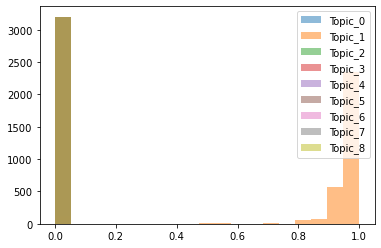

In [365]:
#plot distribution of topics
bins = np.linspace(0.0, 1.0, 20)

plt.hist(topics_tweets_2["Topic_0"], bins, alpha=0.5, label='Topic_0')
plt.hist(topics_tweets_2["Topic_1"], bins, alpha=0.5, label='Topic_1')
plt.hist(topics_tweets_2["Topic_2"], bins, alpha=0.5, label='Topic_2')
plt.hist(topics_tweets_2["Topic_3"], bins, alpha=0.5, label='Topic_3')
plt.hist(topics_tweets_2["Topic_4"], bins, alpha=0.5, label='Topic_4')
plt.hist(topics_tweets_2["Topic_5"], bins, alpha=0.5, label='Topic_5')
plt.hist(topics_tweets_2["Topic_6"], bins, alpha=0.5, label='Topic_6')
plt.hist(topics_tweets_2["Topic_7"], bins, alpha=0.5, label='Topic_7')
plt.hist(topics_tweets_2["Topic_8"], bins, alpha=0.5, label='Topic_8')

plt.legend(loc='upper right')
plt.show()

There's still this overwhelming topic 1 that's about eating/health and then these smaller and disparate topics. These at least seem like some of them are communities and worthy of talking about, but I could also see another round of topic modeling needed where I keep choosing those tweets in the main category to try to better understand them (is that just u

# Interpretation 

Through this exploratory topic analysis of a small Twitter dataset, we have identified a few groups that differentially use vocabulary related to attitudes towards healthy eating and foods. 

In our first round of topic analysis, we discovered a different use of the term “body positive.” This phrase had been created and used to identify a rebellious community that contradicted larger norms that encourage people to diet to achieve a “perfect” body. They insist that there are many bodies that can be healthy and that these eating practices and their related ideologies can actually have negative consequences on people’s self-conception and mental health. However, this term was now primarily being used on Twitter to market sexual content like OnlyFans. This shows how terms can be co-opted by other groups and it makes me wonder about why Twitter users are using this term specifically to market their explicit content. I think that the use of this phrase is trying to denote a shared interest in accepting all body types and, in doing so, attract a clientele that supports this activist cause and perhaps is seeking content from creators who have different body shapes. This demonstrates how even a phrase can undergo the circle of culture as it was created for a particular group and purpose but can be used by any groups and can shift its meaning depending on context. Without any overarching regulation, which is the case on most social media sites, these terms might not have the same strict definitions or meanings, particularly for people in disparate communities that are not controlling how the word is used. We additionally saw that there are Twitter users that spam others. There are accounts that tweet the same message repeatedly (whether at celebrities like the K-pop scandal surrounding a star’s diet) or to market a particular product (weight loss diets) or just tweeting at each of their friends to check up on them (like user 1469123406050168835). This type of behavior is typical of social media websites but is difficult to imagine happening in person. It is perhaps not useful for this project unless I wanted to dive more deeply into the ads or spam tweets and what language they use to encourage people to diet, but it does demonstrate how online and in-person conversations and language differ. This will be important for interpreting any of our findings, as we are limited by the medium which gives us a different angle to understand multifaceted cultural patterns. 

In our second topic analysis, we demonstrated that there are smaller communities within the larger conversations about healthy eating. There is a very clear and defined vegan community (topic  0) that focuses on sharing vegan recipes, promoting their ways of eating (govegan), and their moral reasons for their diet (cruelty free). There were also smaller topics that focused on keto diets and how effective they were for losing weight (topic 1). I originally thought that there was also a more public health-oriented topic that discussed the intersection of obesity, diabetes, pregnancy, illiteracy, and the disparities of these by location and age (topic 3). However, looking at it, we can see instead it’s a Twitter user using public health statistics to ridicule Southern states.  There were still many topics that were not as interpretable (4, 5, 6) or too specific (an Arby’s ad campaign). There was still the overarching category that discussed our primary interests of eating, calories, food, diet, losing weight, and health together (topic 1). This perhaps illustrates that there are a few subcommunities that discuss these subjects, but they do not use meaningfully different vocabulary. 

Overall, from this analysis I can see the potential for different topics and smaller subgroups amongst Twitter users who discuss health and eating. There seems to be a large focus on calorie tracking and dieting, but there are also efforts to share resources and healthy recipes by different definitions (as seen with the vegan and keto groups). I think there are some serious limitations and room to improve in this analysis, which I will discuss next. 


# Next Steps 


As seen with the repeated efforts to further clean this dataset, there are some serious areas for improvement that will hopefully clarify cultural patterns around eating practices, concepts of healthy, and diet culture.

 The first step is to clarify the query. Right now, the query is returning tweets from many disparate communities and some undesired information (explicit content & spam). I think a more concise and focused query may better capture tweets related to my primary interest around healthy eating and then I will use secondary methods to try to identify whether there are distinct communities like fitness influencers, public health professionals, body positive activists, or those looking primarily looking for/promoting weight loss tips. I want to make this query broader to focus on larger ideologies surrounding ideologies surrounding healthy eating and eliminate some of the more specific words (calorie, keto, body positive). I do worry that a broader query may again return some irrelevant information – but as I discussed before, I think I have a new strategy to remove spam and hopefully the explicit content will be removed by eliminating the term “body positive.” 

After I test this new query, I want to scale this project up to be able to capture larger cultural patterns on Twitter surrounding healthy eating. This generalizability will be limited by my Twitter developer account which can only scrape information from the prior 7 days. Therefore, no longitudinal arguments can be made. However, it offers us greater insight into these communities’ function, interact, and talk within a large enough time frame given the quick and short-lived nature of Twitter discussions. I will collect all available pages of Twitter data for my given query. 

I am also interested in further exploring the networks of these communities. Right now, we have only performed an exploratory analysis of what general language is used to discuss healthy eating. However, we don’t know how these topics are being used in groups. Are there groups that primarily discuss obesity in an academic tone? The body positive activists? I think combining the topic analysis with a network analysis would help clarify what, if any, subgroups there are among those who discuss healthy eating on Twitter and if they talk about topics in meaningfully different ways. I think this network analysis might be best constructed by drawing ties between users who retweet/reply to each other. 

Lastly, I think there are some additional model selection steps that could be conducted that might make these topics more interpretable. There’s some additional hyperparameter tuning, text cleaning, and testing more models that could be conducted.

I think these additional steps would allow me to better capture conversations about healthy eating, identify relevant subgroups and their use of language, and generalize these to the level approaching Twitter culture. I am interested in discussing this project in more depth with you all to see if you would recommend additional steps or have advice on how to conduct the steps I’ve proposed. 
